## Лабораторная работа №3 Численное интегрирование 


#### Заволович Богдан Б20-215

Вычислить приближенное значение интеграла на отрезке [a,b], используя формулу прямоугольников, трапеции и Симпсона. Исследовать зависимость ошибки вычислений от шага сетки.

#### Вариант 18

$$f(x) = \frac{1}{\sinh{x}}$$


In [131]:
import numpy as np
import matplotlib.pyplot as plt

In [132]:
a = 1 #начало интервала
b = 2 #конец интервала
h = 1e-6 #шаг сетки

In [133]:
#изначальная функция
def function(x):
    return 1/np.sinh(x)


In [134]:
#интеграл
def int_function(a, b):
    return np.log(np.tanh(b/2)) - np.log(np.tanh(a/2))

In [135]:
#график функции f(x)
x = np.arange(a, b, h)
y = function(x)

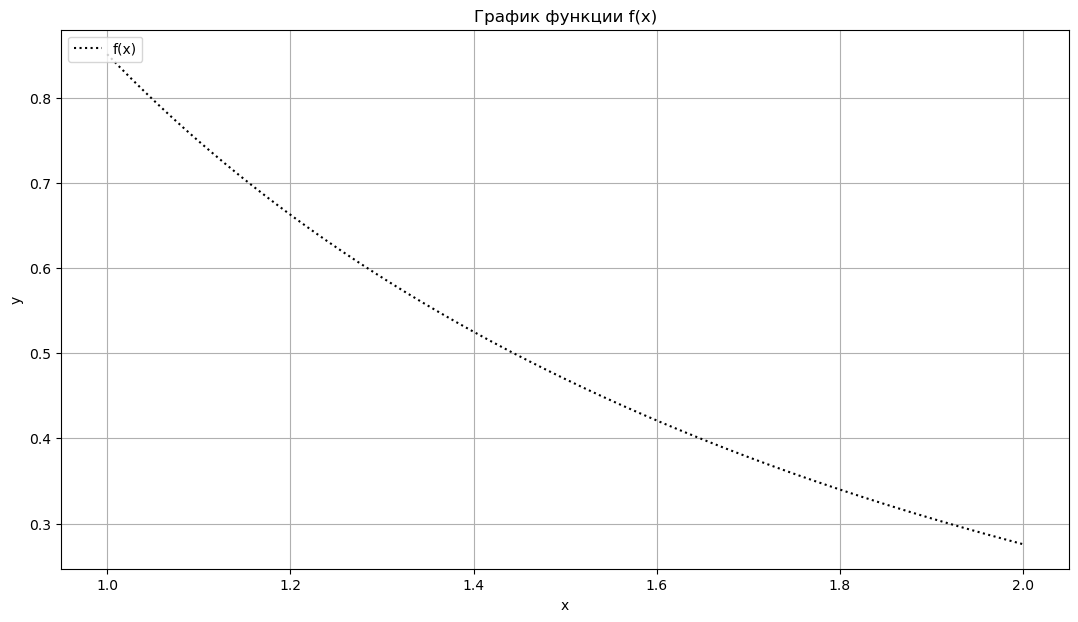

In [136]:
fig = plt.figure(figsize=(13,7)) 

#график f(x)
plt.plot(x, y, ':', color="black", label="f(x)")

plt.title('График функции f(x)')
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

_________
### Метод прямоугольников

In [137]:
def rect(x_array, h):
    area = 0
    for x in x_array:
        area += h*(function(x))
    return area

In [138]:
integral_rect = rect(x, h)
print(integral_rect)

0.49959565161074393


____________
### Метод трапеции

In [139]:
def trapeze(x_array, h):
    area = 0
    for x in x_array:
        area += h*0.5*(function(x)+function(x+h))
    return area

In [140]:
integral_trapeze = trapeze(x, h)
print(integral_trapeze)

0.49959536401193494


______________________________
### Формула Симпсона

In [141]:
def simpson(x_array, h):
    area = 0
    for x in x_array:
        area += (1/6)*h*(function(x-h) + 4*function(x) + function(x+h))
    return area

In [142]:
integral_simpson = simpson(x, h)
print(integral_simpson)

0.4995956516108835


_________________
### Погрешности

In [143]:
steps = [10**i for i in range(-5, 0, 1)]
print("Steps: " + str(steps) + "\n")

dy_rect = list()
dy_trapeze = list()
dy_simpson = list()

integral_true = int_function(a, b)
print("True value of integral: " + str(integral_true))

Steps: [1e-05, 0.0001, 0.001, 0.01, 0.1]

True value of integral: 0.4995953639934732


In [144]:
# def rect_dy(x_array, h):
#     dy = list()
#     for x in x_array:
#         true_area_val = int_function(x, x+h)
#         area_val = h*(function(x+h/2))
#         dy.append(abs(true_area_val - area_val))
#     return max(dy)

# def trapeze_dy(x_array, h):
#     dy = list()                 
#     for x in x_array:
#         true_area_val = int_function(x, x+h)
#         area_val = h*0.5*(function(x)+function(x+h))
#         dy.append(abs(true_area_val - area_val))
#     return max(dy)

# def simpson_dy(x_array, h):
#     dy = list()                 
#     for x in x_array:
#         true_area_val = int_function(x-h, x+h)
#         area_val = (1/6)*h*(function(x-h) + 4*function(x) + function(x+h))
#         dy.append(abs(true_area_val - area_val))             
#     return max(dy)

In [145]:
for step in steps:
    
    print("Current step: " + str(step))
    x = np.arange(a, b, step)

    integral_rect = rect(x, step)
    integral_trapeze = trapeze(x, step)
    integral_simpson = simpson(x, step)
    
    dy_rect.append(abs(-integral_true+integral_rect))
    dy_trapeze.append(abs(-integral_true+integral_trapeze))
    dy_simpson.append(abs(-integral_true+integral_simpson))

Current step: 1e-05
Current step: 0.0001
Current step: 0.001
Current step: 0.01
Current step: 0.1


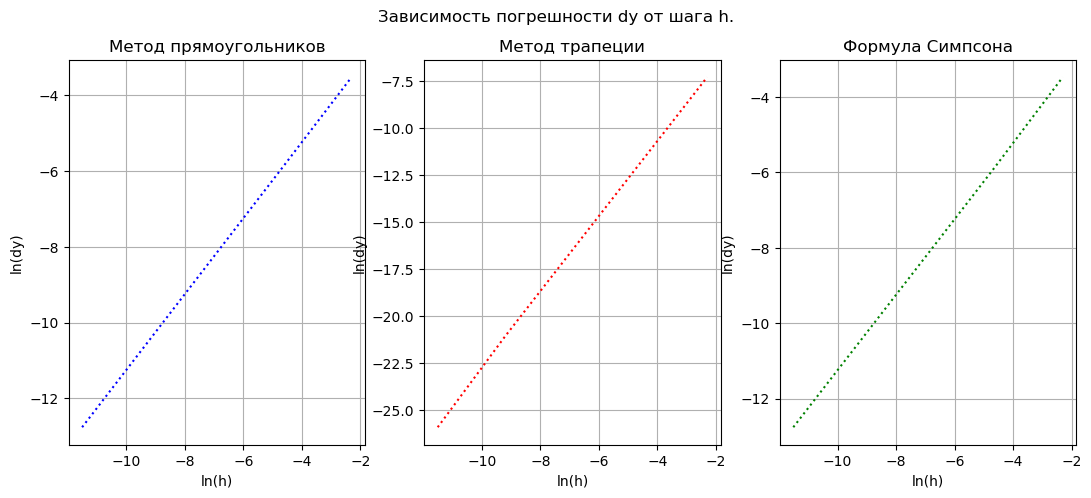

In [146]:
fig, axs = plt.subplots(1, 3, figsize=(13,5))

#график абсолютной погрешности
axs[0].plot(np.log(steps), np.log(dy_rect), ':', color='blue', label="метод прямоугольников")
axs[0].set_title("Метод прямоугольников")
axs[0].set_xlabel('ln(h)')
axs[0].set_ylabel('ln(dy)')
axs[0].grid(True)

axs[1].plot(np.log(steps), np.log(dy_trapeze), ':', color='red', label="метод трапеции")
axs[1].set_title("Метод трапеции")
axs[1].set_xlabel('ln(h)')
axs[1].set_ylabel('ln(dy)')
axs[1].grid(True)

axs[2].plot(np.log(steps), np.log(dy_simpson), ':', color='green', label="формула Симпсона")
axs[2].set_title("Формула Симпсона")
axs[2].set_xlabel('ln(h)')
axs[2].set_ylabel('ln(dy)')
axs[2].grid(True)

fig.suptitle(f'Зависимость погрешности dy от шага h.')

# plt.plot(np.log(steps), np.log(dy_rect))
# plt.plot(np.log(steps), np.log(dy_trapeze))
plt.show()

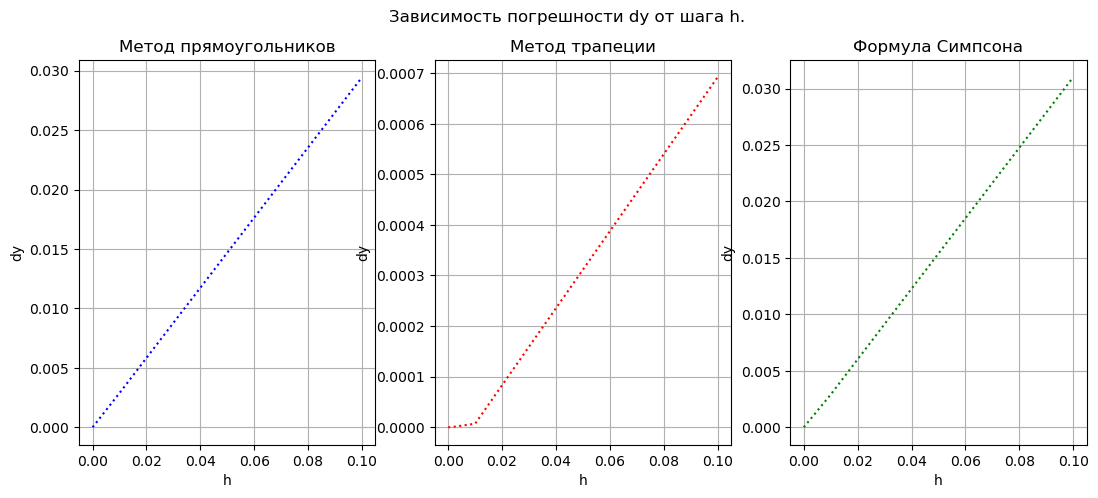

In [147]:
fig, axs = plt.subplots(1, 3, figsize=(13,5))

#график абсолютной погрешности
axs[0].plot(steps, dy_rect, ':', color='blue', label="метод прямоугольников")
axs[0].set_title("Метод прямоугольников")
axs[0].set_xlabel('h')
axs[0].set_ylabel('dy')
axs[0].grid(True)

axs[1].plot(steps, dy_trapeze, ':', color='red', label="метод трапеции")
axs[1].set_title("Метод трапеции")
axs[1].set_xlabel('h')
axs[1].set_ylabel('dy')
axs[1].grid(True)

axs[2].plot(steps, dy_simpson, ':', color='green', label="формула Симпсона")
axs[2].set_title("Формула Симпсона")
axs[2].set_xlabel('h')
axs[2].set_ylabel('dy')
axs[2].grid(True)

fig.suptitle(f'Зависимость погрешности dy от шага h.')

# plt.plot(np.log(steps), np.log(dy_rect))
# plt.plot(np.log(steps), np.log(dy_trapeze))
plt.show()

In [148]:
print(dy_rect)
print(dy_trapeze)
print(dy_simpson)

[2.8759932765298757e-06, 2.8760570929875495e-05, 0.00028766805479402136, 0.0028829150445825458, 0.029451840989965616]
[5.466127550590727e-12, 6.927555751268244e-10, 6.927306073212236e-08, 6.9272272447684635e-06, 0.0006919628165886205]
[2.876007128393976e-06, 2.8761956535783284e-05, 0.00028780674816336616, 0.0028969183384456865, 0.03100164741783712]
